In [1]:
# !pip install ctgan

In [2]:
# !pip install table_evaluator

In [3]:
import pandas as pd
import io
from sklearn.preprocessing import LabelEncoder
 
data = pd.read_csv('dataset/tpmd_og.csv')
data = data.drop('date', axis=1)
data

,T,RH,LW,WS,GR,Class
0,32.3,47.0,24,3,51,Non-Conducive
1,31.6,45.0,23,2,49,Non-Conducive
2,30.4,43.0,21,4,46,Non-Conducive
3,31.7,46.0,24,3,50,Non-Conducive
4,32.5,50.0,27,1,53,Non-Conducive
...,...,...,...,...,...,...
239,18.5,60.0,31,4,28,Non-Conducive
240,19.6,61.0,30,3,26,Non-Conducive
241,20.4,64.0,27,2,25,Non-Conducive
242,21.1,67.0,29,1,27,Non-Conducive


In [4]:
categorical_features = ['T', 'RH', 'LW', 'WS','GR']
target = data[['Class']]
target.head()
le = LabelEncoder()
t = le.fit_transform(target)
print(t)
data['Class'] = t
print(data.head(25))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
       T    RH  LW  WS  GR  Class
0   32.3  47.0  24   3  51      1
1   31.6  45.0  23   2  49      1
2   30.4  43.0  21   4  46      1
3   31.7  46.0  24   3  50      1
4   32.5  50.0  27   1  53      1
5   33.2  54.0  29   2  56      1
6   31.6  49.0  26   4  54      1
7   30.2  47.0  25   3  51      1
8   30.8  48.0  24   4  53      1
9   29.5  45.0  22   5  50      1
10  28.7  46.0  23   3  47      1
11  29.3  50.0  25   2  49      1
12  28.1  48.0  24   3  48      1
13  27.6  45.0  22   4  46  

c:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 200)

Epoch 1, Loss G:  3.4084,Loss D: -0.0044
Epoch 2, Loss G:  3.3775,Loss D: -0.0036
Epoch 3, Loss G:  3.4054,Loss D: -0.0205
Epoch 4, Loss G:  3.4593,Loss D: -0.0069
Epoch 5, Loss G:  3.4725,Loss D: -0.0255
Epoch 6, Loss G:  3.4115,Loss D: -0.0317
Epoch 7, Loss G:  3.3636,Loss D: -0.0209
Epoch 8, Loss G:  3.3527,Loss D: -0.0307
Epoch 9, Loss G:  3.4019,Loss D: -0.0261
Epoch 10, Loss G:  3.4147,Loss D: -0.0383
Epoch 11, Loss G:  3.3678,Loss D: -0.0276
Epoch 12, Loss G:  3.3638,Loss D: -0.0248
Epoch 13, Loss G:  3.2869,Loss D: -0.0539
Epoch 14, Loss G:  3.3095,Loss D: -0.0250
Epoch 15, Loss G:  3.2611,Loss D: -0.0606
Epoch 16, Loss G:  3.2240,Loss D: -0.0596
Epoch 17, Loss G:  3.2995,Loss D: -0.0700
Epoch 18, Loss G:  3.2896,Loss D: -0.0317
Epoch 19, Loss G:  3.2342,Loss D: -0.0608
Epoch 20, Loss G:  3.2552,Loss D: -0.0544
Epoch 21, Loss G:  3.1888,Loss D: -0.0395
Epoch 22, Loss G:  3.1811,Loss D: -0.0402
Epoch 23, Loss G:  3.2121,Loss D: -0.0145
Epoch 24, Loss G:  3.1661,Loss D: -0.0535
E

In [6]:
samples = ctgan.sample(1000)

In [7]:
samples

,T,RH,LW,WS,GR,Class
0,29.5,80.0,24,2,43,1
1,30.2,62.0,28,1,32,1
2,25.5,72.0,30,3,36,0
3,29.5,74.0,24,2,39,1
4,29.3,66.0,38,4,33,0
...,...,...,...,...,...,...
995,21.8,61.0,24,3,37,1
996,31.6,48.0,33,2,42,1
997,26.4,71.0,25,1,34,1
998,20.5,69.0,37,4,50,1


(244, 6) (1000, 6)


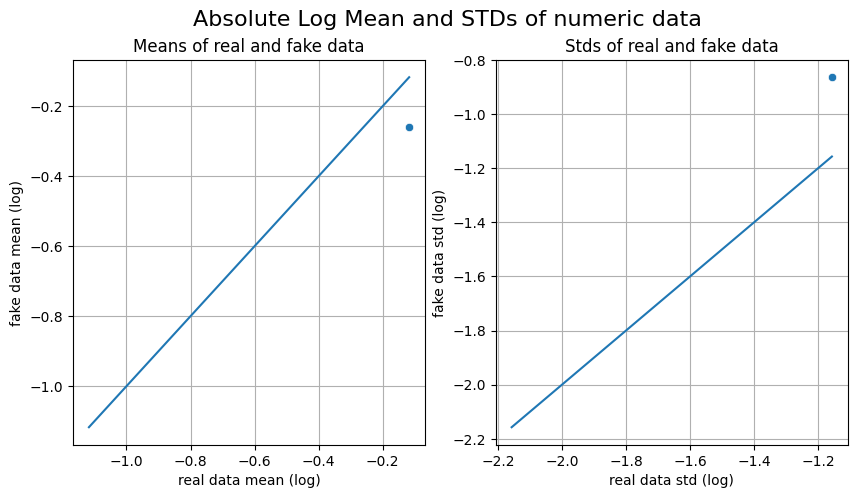

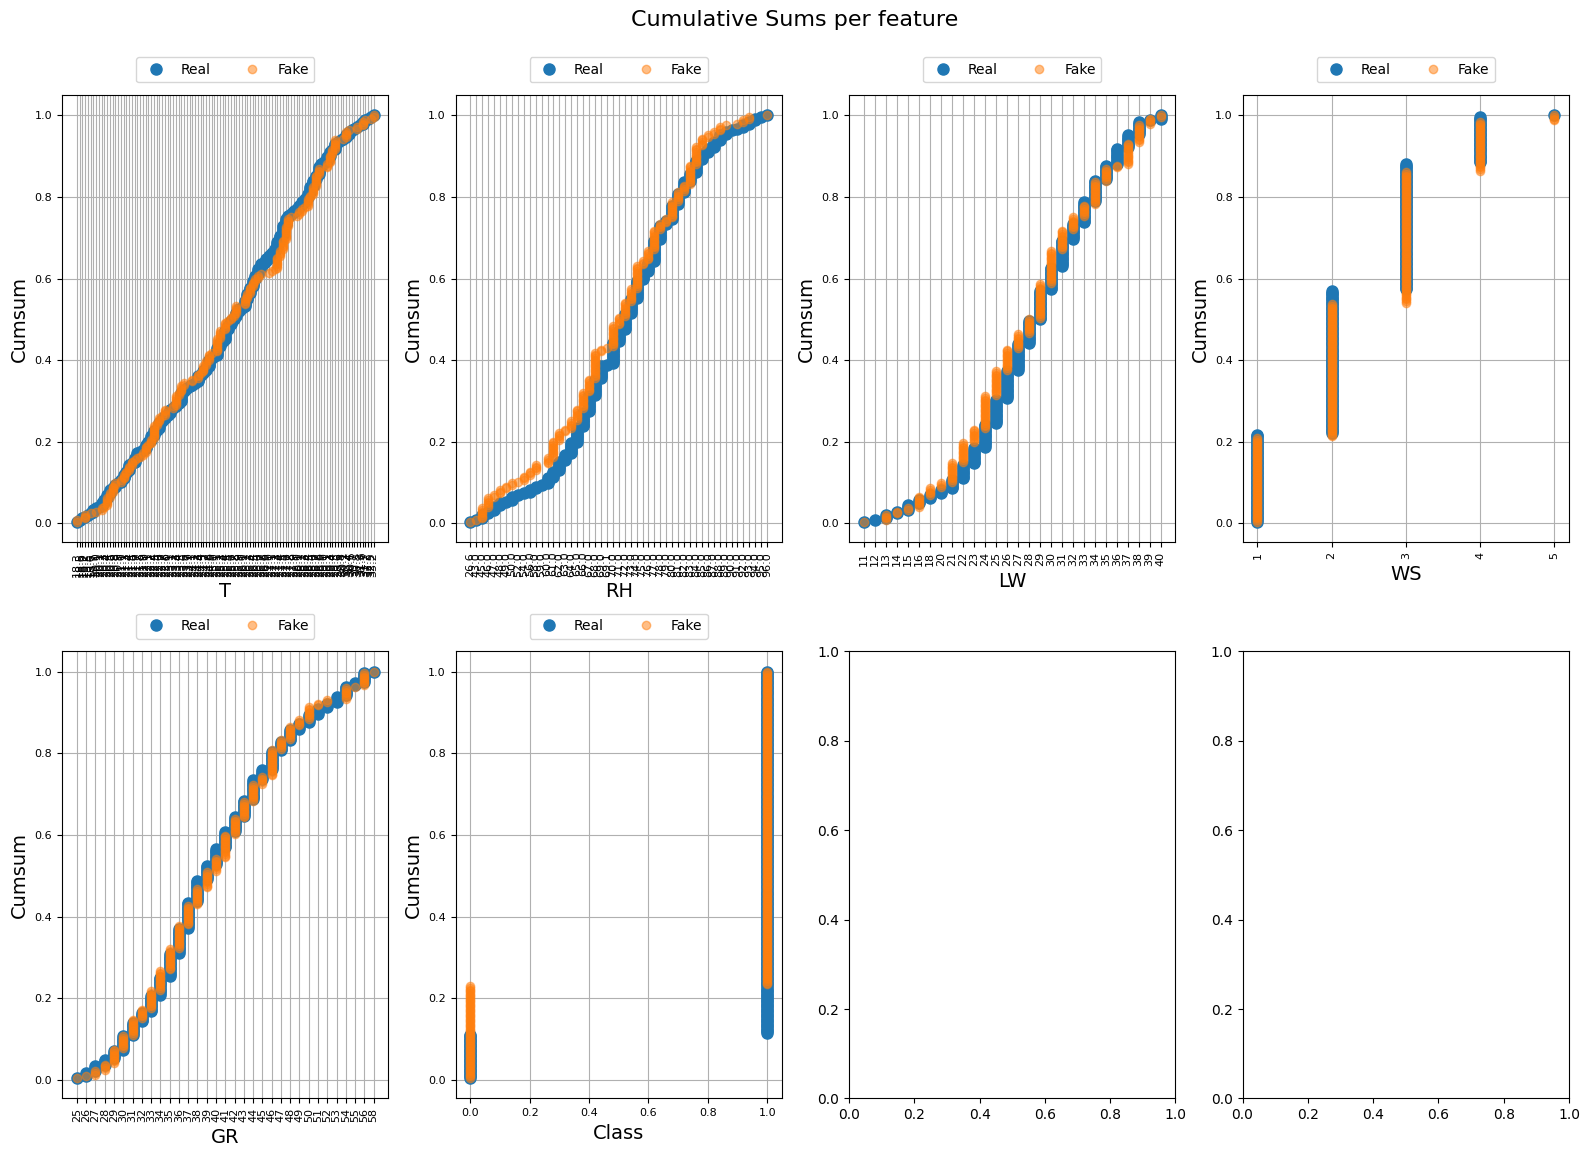

c:\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})


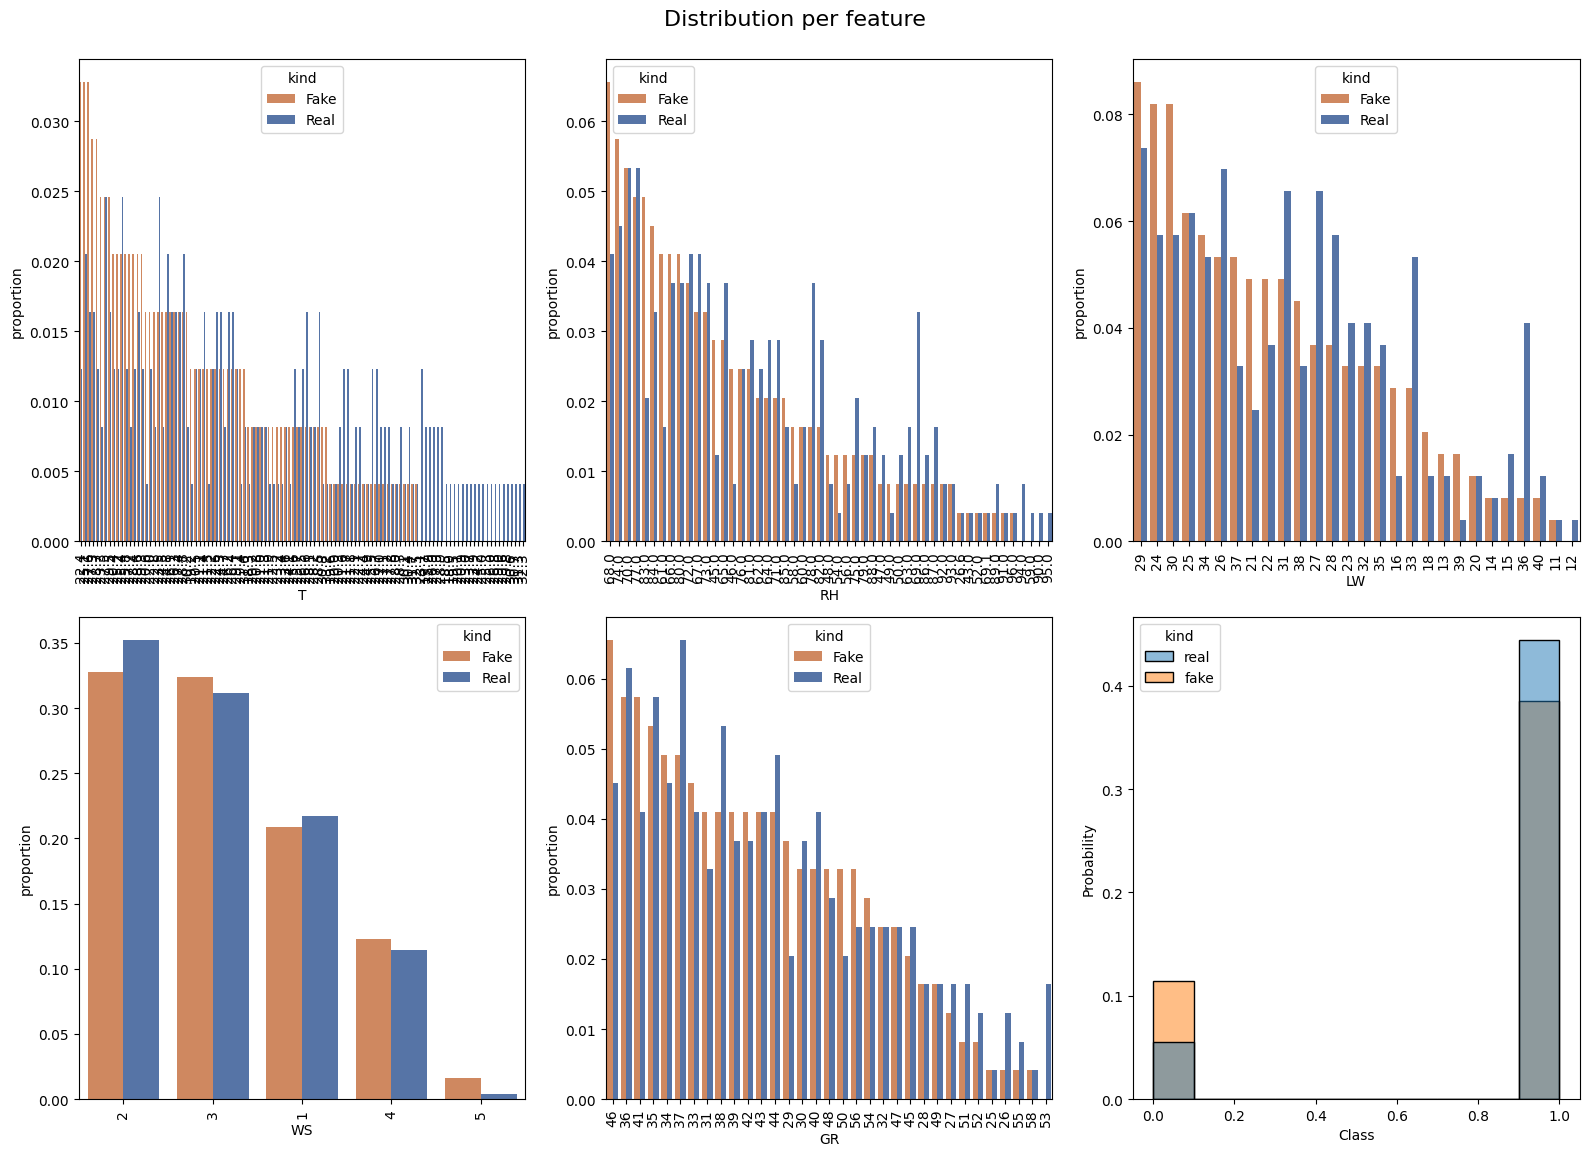

TypeError: Image data of dtype object cannot be converted to float

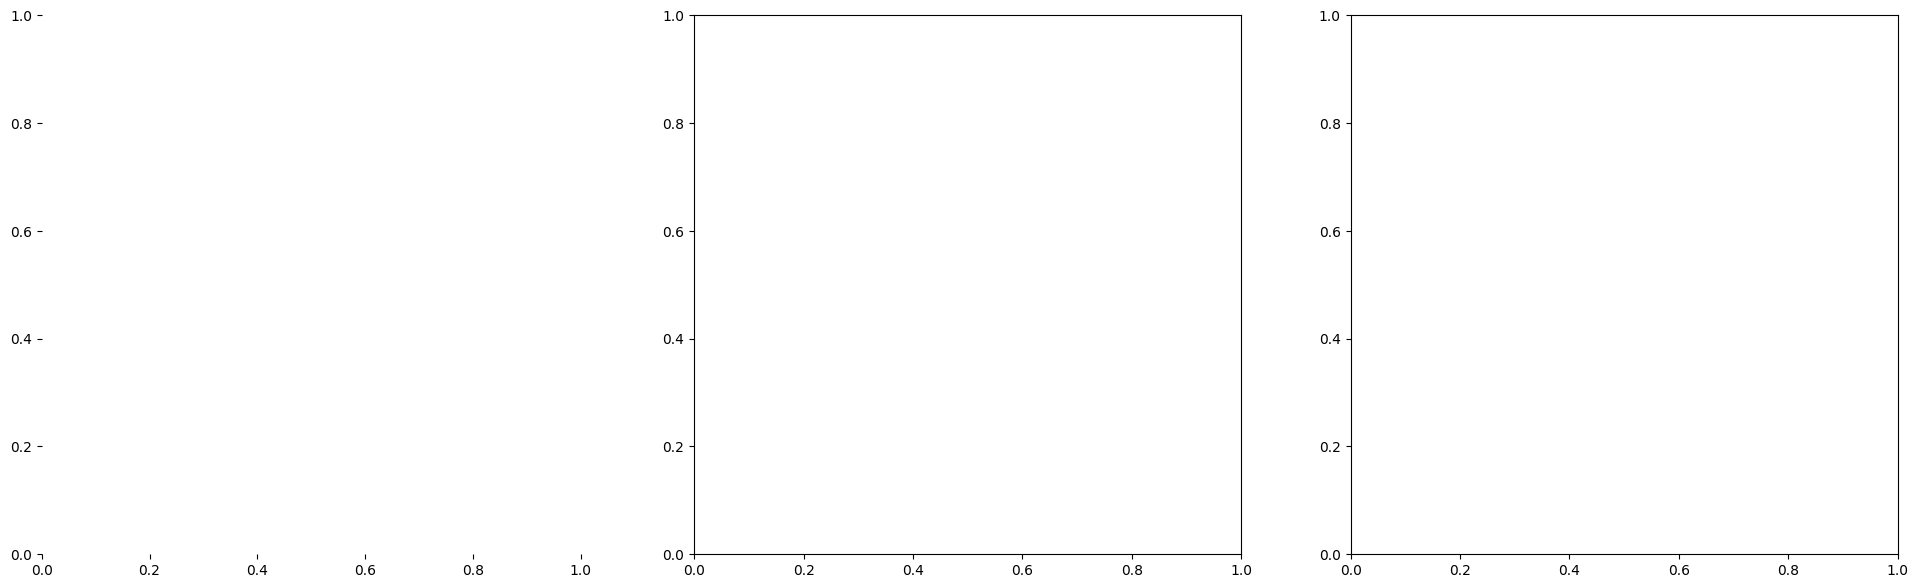

In [8]:
# %pip install table_evaluator
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

In [ ]:
# from google.colab import drive
# drive.mount('drive')

samples.to_csv('augmented.csv')
# !cp augmented1k.csv "drive/My Drive/"